In [7]:
!pip install holoviews
!pip install prophet
!pip install alpaca_trade_api
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.7 MB/s 


In [8]:
import json
import pandas as pd
import hvplot.pandas
import holoviews as hv

from prophet import Prophet
from alpaca_trade_api.rest import REST, TimeFrame

Output hidden; open in https://colab.research.google.com to view.

In [6]:
import os
import json
import pandas as pd

from alpaca_trade_api.rest import REST, TimeFrame

In [40]:
data_path = './data'

for filename in os.listdir(data_path):
    filepath = os.path.join(data_path, filename)
    os.remove(filepath)

def refresh_data(coin_name):
    """
        coin_name: ETHUSD, BTCUSD
    """
    temp_data_path = f"./data/last_9_hours_alpaca{coin_name}.csv"

    # Read the secret data from env file
    with open("env", "r") as f:
      secret = json.loads(f.read())

    # Get data from Alpaca API with 1 hour interval between 2018-01-01 and 2022-10-19
    with REST(key_id=secret['ALPACA_API_KEY'], secret_key=secret['ALPACA_SECRET_KEY']) as api:
        data = api.get_crypto_bars(coin_name, TimeFrame.Minute).df

    data.to_csv(temp_data_path)
    
def get_last_value(coin_name):
    """
        coin_name: ETHUSD, BTCUSD
    """
    temp_data_path = f"./data/last_9_hours_alpaca{coin_name}.csv"
    data = pd.read_csv(temp_data_path)
    data = data[data.exchange == 'ERSX'] # TODO: which exchange?

    return data.close.to_list()[-1]
    
    
refresh_data("ETHUSD")
refresh_data("BTCUSD")

In [41]:
def get_last_value(coin_name):
    """
        coin_name: ETHUSD, BTCUSD
    """
    temp_data_path = f"./data/last_9_hours_alpaca{coin_name}.csv"
    data = pd.read_csv(temp_data_path)
    data = data[data.exchange == 'ERSX'] # TODO: which exchange?

    return data.close.to_list()[-1]

In [42]:
get_last_value("BTCUSD")

16568.0

In [43]:
data

,timestamp,exchange,open,high,low,close,volume,trade_count,vwap
2,2022-11-23 06:00:00+00:00,ERSX,1157.13,1162.65,1155.68,1160.78,466.860000,350,1158.540436
5,2022-11-23 07:00:00+00:00,ERSX,1160.85,1167.33,1157.16,1165.90,126.199849,140,1163.831667
8,2022-11-23 08:00:00+00:00,ERSX,1166.55,1172.14,1159.71,1163.29,373.550000,237,1163.281380
11,2022-11-23 09:00:00+00:00,ERSX,1163.34,1169.57,1161.76,1169.57,40.290000,26,1163.233517
14,2022-11-23 10:00:00+00:00,ERSX,1166.78,1181.37,1161.22,1173.18,577.778619,173,1174.763771
17,2022-11-23 11:00:00+00:00,ERSX,1173.05,1176.51,1169.53,1173.06,510.388569,294,1173.301661
20,2022-11-23 12:00:00+00:00,ERSX,1174.10,1176.07,1163.52,1163.52,75.150000,102,1168.209328
23,2022-11-23 13:00:00+00:00,ERSX,1165.44,1166.64,1154.85,1155.90,385.214754,248,1162.045708
26,2022-11-23 14:00:00+00:00,ERSX,1156.32,1165.88,1153.08,1165.88,248.712019,126,1157.600270
29,2022-11-23 15:00:00+00:00,ERSX,1164.42,1173.28,1159.77,1160.59,295.346695,55,1166.829571


In [11]:
# Holoviews extension to render hvPlot plots in Colab
hv.extension('bokeh')

# Plot predictions for our forecast period
prophet_data[['ds', 'y']].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
model = Prophet() # Create model object
model.fit(prophet_data) # fit model 

DEBUG:cmdstanpy:input tempfile: /tmp/tmppe6ewsag/9_cu548p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppe6ewsag/ui90hs7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5516', 'data', 'file=/tmp/tmppe6ewsag/9_cu548p.json', 'init=/tmp/tmppe6ewsag/ui90hs7b.json', 'output', 'file=/tmp/tmppe6ewsag/prophet_modelg44vs3in/prophet_model-20221024062647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 1000 hours 
future = model.make_future_dataframe(periods=1000, freq='H')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))
display(future.tail(10))

,ds
0,2020-04-08 08:00:00
1,2020-04-14 06:00:00
2,2020-04-14 07:00:00
3,2020-04-22 23:00:00
4,2020-04-28 12:00:00
5,2020-04-29 03:00:00
6,2020-04-30 12:00:00
7,2020-05-01 00:00:00
8,2020-05-01 05:00:00
9,2020-05-01 16:00:00


,ds
20082,2022-11-30 11:00:00
20083,2022-11-30 12:00:00
20084,2022-11-30 13:00:00
20085,2022-11-30 14:00:00
20086,2022-11-30 15:00:00
20087,2022-11-30 16:00:00
20088,2022-11-30 17:00:00
20089,2022-11-30 18:00:00
20090,2022-11-30 19:00:00
20091,2022-11-30 20:00:00


In [14]:
# Make a forecast based on the future DataFrame
forecast = model.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-08 08:00:00,-16024.514928,-1667.334546,3756.350920,-16024.514928,-16024.514928,17026.299617,17026.299617,17026.299617,6.810097,...,58.525219,58.525219,58.525219,16960.964301,16960.964301,16960.964301,0.0,0.0,0.0,1001.784689
1,2020-04-14 06:00:00,-14605.137106,-204.704330,5750.473904,-14605.137106,-14605.137106,17425.224929,17425.224929,17425.224929,-3.176195,...,-16.320994,-16.320994,-16.320994,17444.722118,17444.722118,17444.722118,0.0,0.0,0.0,2820.087823
2,2020-04-14 07:00:00,-14595.141488,200.431535,5670.939291,-14595.141488,-14595.141488,17435.804158,17435.804158,17435.804158,5.498668,...,-19.588912,-19.588912,-19.588912,17449.894402,17449.894402,17449.894402,0.0,0.0,0.0,2840.662670
3,2020-04-22 23:00:00,-12516.052848,3944.313630,9570.051381,-12516.052848,-12516.052848,19371.672023,19371.672023,19371.672023,17.190834,...,131.563240,131.563240,131.563240,19222.917948,19222.917948,19222.917948,0.0,0.0,0.0,6855.619175
4,2020-04-28 12:00:00,-11186.635592,6611.490344,12042.713323,-11186.635592,-11186.635592,20488.396853,20488.396853,20488.396853,8.076654,...,-31.212149,-31.212149,-31.212149,20511.532347,20511.532347,20511.532347,0.0,0.0,0.0,9301.761260


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20087,2022-11-30 16:00:00,28888.155874,6951.139258,21303.275711,21936.137602,34876.409830,-14365.949219,-14365.949219,-14365.949219,-6.630970,...,115.261464,115.261464,115.261464,-14474.579714,-14474.579714,-14474.579714,0.0,0.0,0.0,14522.206655
20088,2022-11-30 17:00:00,28891.450496,6982.433520,21675.188485,21926.823204,34889.533174,-14382.920136,-14382.920136,-14382.920136,-13.081869,...,120.039984,120.039984,120.039984,-14489.878251,-14489.878251,-14489.878251,0.0,0.0,0.0,14508.530360
20089,2022-11-30 18:00:00,28894.745117,6762.633710,20642.551891,21917.508806,34914.567847,-14393.716455,-14393.716455,-14393.716455,-12.596376,...,124.075283,124.075283,124.075283,-14505.195362,-14505.195362,-14505.195362,0.0,0.0,0.0,14501.028662
20090,2022-11-30 19:00:00,28898.039738,7256.696973,20993.678223,21908.194408,34939.602520,-14399.423336,-14399.423336,-14399.423336,-6.207770,...,127.315242,127.315242,127.315242,-14520.530808,-14520.530808,-14520.530808,0.0,0.0,0.0,14498.616402
20091,2022-11-30 20:00:00,28901.334360,7069.315881,20717.865932,21898.880010,34964.637192,-14403.470701,-14403.470701,-14403.470701,2.698109,...,129.715535,129.715535,129.715535,-14535.884345,-14535.884345,-14535.884345,0.0,0.0,0.0,14497.863659


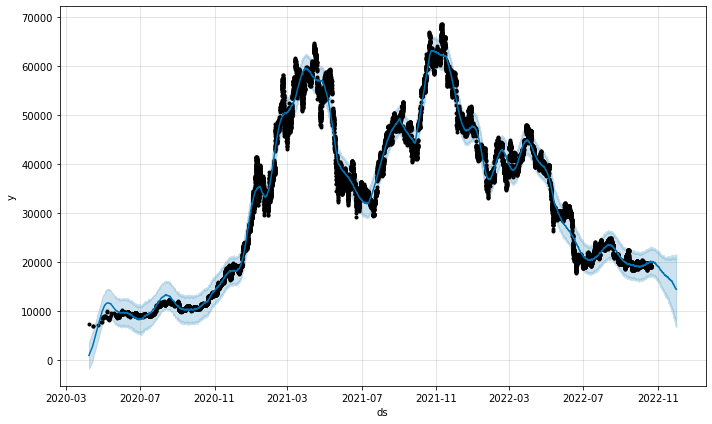

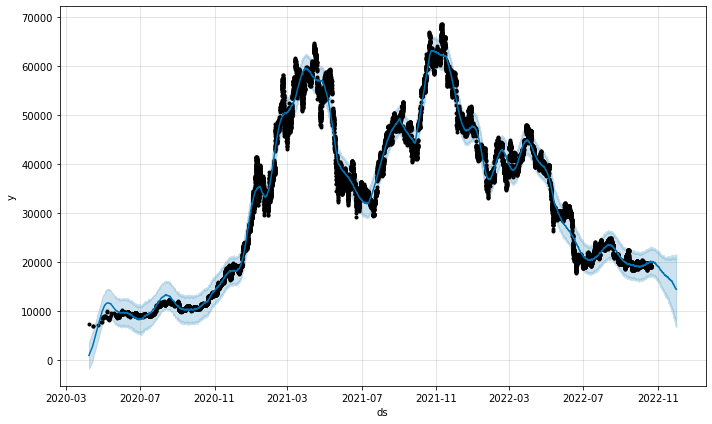

In [15]:
# Plot the forecast using the model’s plot function
model.plot(forecast)

In [16]:
  # Display the underlying forecast dataframe (tail)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
20087,2022-11-30 16:00:00,14522.206655,6951.139258,21303.275711
20088,2022-11-30 17:00:00,14508.530360,6982.433520,21675.188485
20089,2022-11-30 18:00:00,14501.028662,6762.633710,20642.551891
20090,2022-11-30 19:00:00,14498.616402,7256.696973,20993.678223
20091,2022-11-30 20:00:00,14497.863659,7069.315881,20717.865932


In [17]:
# Reset the index to this datetime column so that our plot looks nice
forecast = forecast.set_index('ds')

# Display the DataFrame
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2020-04-08 08:00:00,-16024.514928,-1667.334546,3756.350920,-16024.514928,-16024.514928,17026.299617,17026.299617,17026.299617,6.810097,6.810097,...,58.525219,58.525219,58.525219,16960.964301,16960.964301,16960.964301,0.0,0.0,0.0,1001.784689
2020-04-14 06:00:00,-14605.137106,-204.704330,5750.473904,-14605.137106,-14605.137106,17425.224929,17425.224929,17425.224929,-3.176195,-3.176195,...,-16.320994,-16.320994,-16.320994,17444.722118,17444.722118,17444.722118,0.0,0.0,0.0,2820.087823
2020-04-14 07:00:00,-14595.141488,200.431535,5670.939291,-14595.141488,-14595.141488,17435.804158,17435.804158,17435.804158,5.498668,5.498668,...,-19.588912,-19.588912,-19.588912,17449.894402,17449.894402,17449.894402,0.0,0.0,0.0,2840.662670
2020-04-22 23:00:00,-12516.052848,3944.313630,9570.051381,-12516.052848,-12516.052848,19371.672023,19371.672023,19371.672023,17.190834,17.190834,...,131.563240,131.563240,131.563240,19222.917948,19222.917948,19222.917948,0.0,0.0,0.0,6855.619175
2020-04-28 12:00:00,-11186.635592,6611.490344,12042.713323,-11186.635592,-11186.635592,20488.396853,20488.396853,20488.396853,8.076654,8.076654,...,-31.212149,-31.212149,-31.212149,20511.532347,20511.532347,20511.532347,0.0,0.0,0.0,9301.761260


In [18]:
# Holoviews extension to render hvPlot plots in Colab
hv.extension('bokeh')

# Plot predictions for our forecast period
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# Reset "ds" from the datetime index back to a column
forecast = forecast.reset_index()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-08 08:00:00,-16024.514928,-1667.334546,3756.350920,-16024.514928,-16024.514928,17026.299617,17026.299617,17026.299617,6.810097,...,58.525219,58.525219,58.525219,16960.964301,16960.964301,16960.964301,0.0,0.0,0.0,1001.784689
1,2020-04-14 06:00:00,-14605.137106,-204.704330,5750.473904,-14605.137106,-14605.137106,17425.224929,17425.224929,17425.224929,-3.176195,...,-16.320994,-16.320994,-16.320994,17444.722118,17444.722118,17444.722118,0.0,0.0,0.0,2820.087823
2,2020-04-14 07:00:00,-14595.141488,200.431535,5670.939291,-14595.141488,-14595.141488,17435.804158,17435.804158,17435.804158,5.498668,...,-19.588912,-19.588912,-19.588912,17449.894402,17449.894402,17449.894402,0.0,0.0,0.0,2840.662670
3,2020-04-22 23:00:00,-12516.052848,3944.313630,9570.051381,-12516.052848,-12516.052848,19371.672023,19371.672023,19371.672023,17.190834,...,131.563240,131.563240,131.563240,19222.917948,19222.917948,19222.917948,0.0,0.0,0.0,6855.619175
4,2020-04-28 12:00:00,-11186.635592,6611.490344,12042.713323,-11186.635592,-11186.635592,20488.396853,20488.396853,20488.396853,8.076654,...,-31.212149,-31.212149,-31.212149,20511.532347,20511.532347,20511.532347,0.0,0.0,0.0,9301.761260


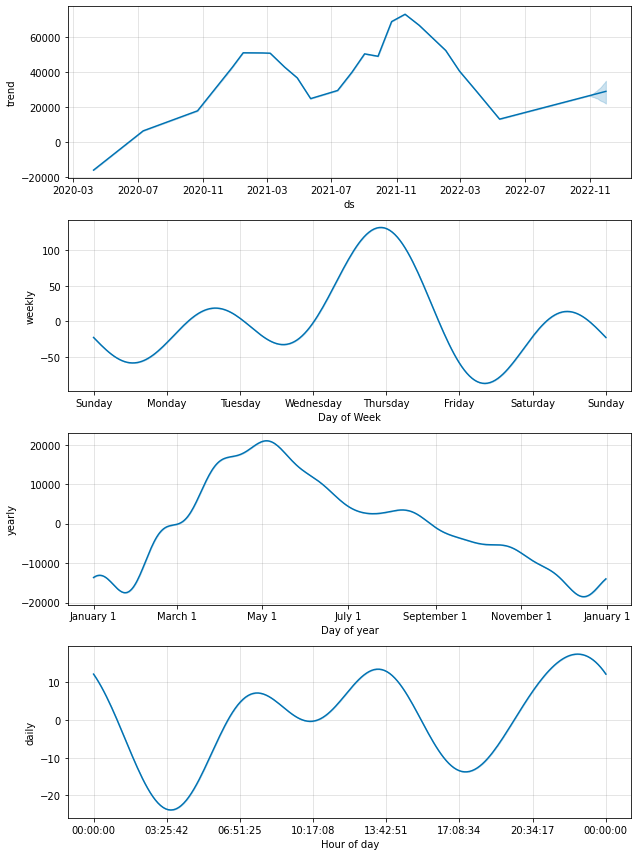

In [20]:
# Plot the individual time series components of the model
fig2 = model.plot_components(forecast)

## Result
#### Based on a prediction we can say that the BitCoin price will be decreasing next 1000 hours.
#### It is gonna reach as low as 16 000 USD by 21-11-2022.
#### So my recomendation is to sell BitCoin now